# 线性回归算法
#### numpy直接搭建线性回归模型

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from duckdb.duckdb import torch
from jinja2 import optimizer

## 1.编写线性回归函数

In [5]:
def linear_regression(X,w,b):
    """线性回归模型"""
    return X*w+b

## 2.编写损失函数
#### 损失函数使用均方损失函数

In [6]:
def squared_loss(y_hat,y):
    """均方损失"""
    return (y_hat-y)**2/2

## 3.编写优化器
#### 优化器使用小批量随机梯度下降SGD

In [36]:
def SGD(params,lr,grad):
    """小批量随机梯度下降"""
    return params-lr*grad

## 4.生成数据集

X 前 5 行：
 [[ 0.52877571 -0.45600126]
 [ 0.89731511 -0.18109201]
 [-0.16752721 -1.31794558]
 [ 1.31245232  0.93877694]
 [ 1.34485157 -0.44283957]]
y 前 5 行：
 [[6.80444573]
 [6.63022715]
 [8.337396  ]
 [3.64485001]
 [8.40054275]]
X 的形状： (1000, 2)
y 的 形状 (1000, 1)


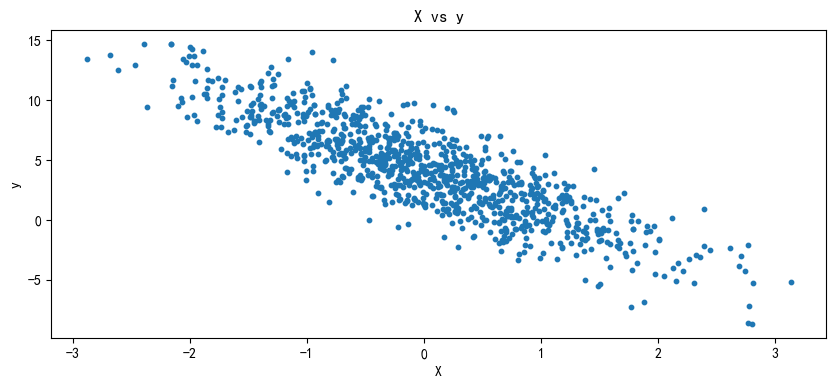

In [22]:
def synthetic_data(w,b,num_samples):
    """线性回归数据集"""
    num_features = len(w)
    X = np.random.randn(num_samples,num_features)
    y = np.dot(X,w) + b
    y += np.random.normal(0,0.01,size=y.shape)
    return X,y.reshape(-1,1)



ture_w =np.array([2,-3.4])
ture_b =4.2
num_samples = 1000

X, y = synthetic_data(ture_w,ture_b,num_samples)

print("X 前 5 行：\n",X[:5])
print("y 前 5 行：\n",y[:5])
print("X 的形状：",X.shape)
print("y 的 形状",y.shape)

#绘制数据集
plt.figure(figsize=(10,4))
plt.scatter(X[:,1],y,s=10)

plt.xlabel('X[:,1]')
plt.ylabel('y')
plt.title("X vs y")
plt.show()

## 5.模型训练


In [37]:
lr = 0.03
epochs = 100
batch_size = 64
w=np.zeros((2,1))
b=0

for epoch in range(epochs):
    total_loss=0
    batch_count=0

    for i in range(0,num_samples,batch_size):
        X_batch,y_batch = X[i:i+batch_size],y[i:i+batch_size]

        y_pred =np.dot(X_batch,w) + b
        #计算梯度
        error = y_pred - y_batch
        grad_w = np.dot(X_batch.T,error) / batch_size
        grad_b = np.sum(error) / batch_size

        #使用SGD
        b=SGD(b,lr,grad_b)
        w=SGD(w,lr,grad_w)

        loss = np.mean(squared_loss(y_batch,y_pred))
        total_loss += loss
        batch_count+= 1

    avg_loss = total_loss / batch_count
    print("epoch:",epoch,"loss:",avg_loss)

print(ture_w.ravel(),ture_b)
print(w.ravel(),b)

epoch: 0 loss: 10.812427224614483
epoch: 1 loss: 4.218648227140845
epoch: 2 loss: 1.6486061868519863
epoch: 3 loss: 0.6453015195581565
epoch: 4 loss: 0.2530052553176899
epoch: 5 loss: 0.09937192322533393
epoch: 6 loss: 0.03910932152490667
epoch: 7 loss: 0.015433562867432698
epoch: 8 loss: 0.006116926836343878
epoch: 9 loss: 0.0024447357879606112
epoch: 10 loss: 0.000994880235374578
epoch: 11 loss: 0.0004214273595264254
epoch: 12 loss: 0.00019417251634382295
epoch: 13 loss: 0.00010391461120174103
epoch: 14 loss: 6.797286839852855e-05
epoch: 15 loss: 5.3613051526925254e-05
epoch: 16 loss: 4.7850777439060236e-05
epoch: 17 loss: 4.552462161721793e-05
epoch: 18 loss: 4.4577640955799636e-05
epoch: 19 loss: 4.418748171151582e-05
epoch: 20 loss: 4.4023990605529864e-05
epoch: 21 loss: 4.395385721166382e-05
epoch: 22 loss: 4.3922817387618335e-05
epoch: 23 loss: 4.390852841609892e-05
epoch: 24 loss: 4.3901640516453995e-05
epoch: 25 loss: 4.389815198883453e-05
epoch: 26 loss: 4.389629769541671e-05

# 6.绘制线性模型

Text(0.5, 1.0, 'X vs y')

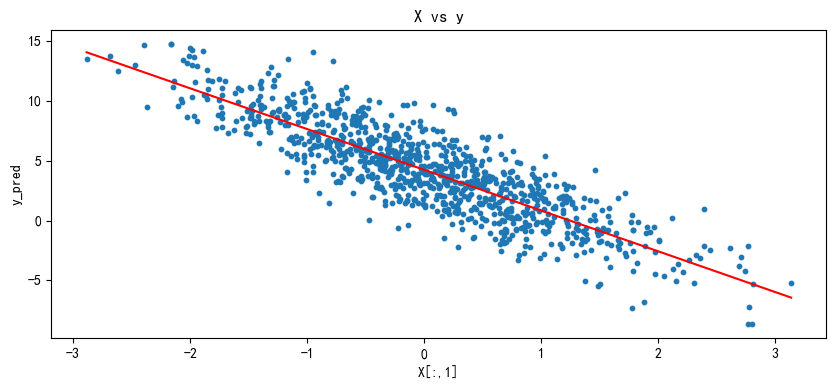

In [56]:
y_pred = np.dot(X,w).ravel() + b

plt.figure(figsize=(10,4))
plt.scatter(X[:,1],y.ravel(),s=10)
x_line=np.linspace(X[:,1].min(),X[:,1].max(),100)
y_line= w[0]*X[:,0].mean()+w[1]*x_line + b
plt.plot(x_line,y_line,color='r')

plt.xlabel('X[:,1]')
plt.ylabel('y_pred')
plt.title("X vs y")


# 使用PyTorch搭建线性回归模型


In [99]:
import torch
import numpy as np
#编写函数
def linear_regression(X, w, b):
    return torch.matmul(X,w)+b

def SGD(params,lr,batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr*param.grad #/ batch_siz
            param.grad.zero_()

def synthetic_data(w,b,num_samples):
    num_features = len(w)
    X = torch.normal(0,1,size=(num_samples,num_features))
    y = torch.matmul(X,w) + b
    y += torch.normal(0,0.01,size=y.shape)
    return X,y.reshape((-1,1))

def squared_loss(y_hat,y):
    return (y_hat-y)**2


ture_w =torch.tensor([2,-3.4])
ture_b =4.2
num_samples = 1000
X, y = synthetic_data(ture_w,ture_b,num_samples)

#初始化
lr = 0.03
epochs = 100
batch_size = 64

w=torch.zeros((2,1),requires_grad=True)#需要计算梯度
b=torch.tensor(0.0 ,requires_grad=True)

#模型训练
for epoch in range(epochs):
    total_loss=0
    batch_count=0
    for i in range(0,num_samples,batch_size):
        X_batch,y_batch = X[i:i+batch_size],y[i:i+batch_size]
        y_pred = linear_regression(X_batch,w,b)
        #这里使用torch.sum(),不使用torch。torch.mean
        loss = torch.mean(squared_loss(y_batch,y_pred))

        #计算梯度(120ms)
        loss.backward()
        SGD([w,b],lr,batch_size)

        #使用torch的优化器(960ms)
        # optimizer=torch.optim.SGD([w,b],lr=lr)
        # optimizer.zero_grad()
        # loss.backward()
        # optimizer.step()

        total_loss += loss.item()
        batch_count+= 1

    print("epoch:",epoch,"loss:",total_loss/batch_count)

print(ture_w.numpy(),ture_b)
print(w.detach().numpy().ravel(),b.item())

epoch: 0 loss: 15.749651789665222
epoch: 1 loss: 1.881762970238924
epoch: 2 loss: 0.22585859056562185
epoch: 3 loss: 0.02731518039945513
epoch: 4 loss: 0.0033968400457524695
epoch: 5 loss: 0.0005010781042074086
epoch: 6 loss: 0.00014911551215845975
epoch: 7 loss: 0.00010635623948473949
epoch: 8 loss: 0.0001012409156828653
epoch: 9 loss: 0.00010066542017739266
epoch: 10 loss: 0.00010061574403152918
epoch: 11 loss: 0.0001006164752652694
epoch: 12 loss: 0.00010061934517580085
epoch: 13 loss: 0.00010062049886983004
epoch: 14 loss: 0.00010062082446893328
epoch: 15 loss: 0.00010062097635454847
epoch: 16 loss: 0.00010062102592200972
epoch: 17 loss: 0.00010062104411190376
epoch: 18 loss: 0.00010062104411190376
epoch: 19 loss: 0.00010062104411190376
epoch: 20 loss: 0.00010062104411190376
epoch: 21 loss: 0.00010062104411190376
epoch: 22 loss: 0.00010062104411190376
epoch: 23 loss: 0.00010062104411190376
epoch: 24 loss: 0.00010062104411190376
epoch: 25 loss: 0.00010062104411190376
epoch: 26 loss:

#### 在相同的epochs下，使用numpy编写的相同代码的预测比用torch编写的梯度下降更快？
##### 1.反向传播时 PyTorch 会自动在梯度中包含 1/batch_size 因子,SGD 里又手动除了一次 batch_size，梯度会被缩小两次，更新幅度过小，学习收敛变慢甚至效果变差。
$ \frac{\partial \text{Loss}}{\partial w} = \frac{2}{N} X^T (y_{\text{pred}} - y) $
##### 2.修改SGD，不要手动除去batch_size

In [ ]:
def SGD(params,lr,batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr*param.grad # / batch_size除去
            param.grad.zero_()

##### 3.用 .sum() 而不是 .mean()

In [ ]:
#这里使用torch.sum(),不使用torch。torch.mean
        loss = torch.sum(squared_loss(y_batch,y_pred))

##### 4.使用官方优化器optimizer

In [ ]:
optimizer=torch.optim.SGD([w,b],lr=lr)
optimizer.zero_grad()
loss.backward()
optimizer.step()

#### 使用numpy用手动的SGD运算30ms，torch用手动SGD120ms，用官方optimizer960ms

##### 1.NumPy 只进行数值计算，不涉及计算图，也不存储梯度。
##### 2.手写的 SGD() 有计算图，存储梯度，执行 backward()
##### 3.optimizer 额外计算动量、权重衰减、自适应学习率，管理计算图